In this project we will clusture Instagram visiting score and the spending rank(0-100) using kmeans clusturing
I will use pandas for data cleaning if needed and sckit-lean for machine leaning

In [1]:
#Importing all the libraries required for the project 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
# Load data as csv file from local machine

df = pd.read_csv('C:\\Users\\DercoN\\Desktop\\Python\\csv_files\\insta.csv' , delimiter=';')

In [3]:
df.head()

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


In [4]:
# Remove User ID column as it is not needed/not important for this project

df.drop(['User ID'], axis='columns', inplace=True)

In [5]:
df.head()

,Instagram visit score,Spending_rank(0 to 100)
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397


In [6]:
df.shape

(2600, 2)

In [7]:
df.dtypes

Instagram visit score        int64
Spending_rank(0 to 100)    float64
dtype: object

In [8]:
df.isnull().sum()

Instagram visit score      0
Spending_rank(0 to 100)    0
dtype: int64

In [10]:
#Looks like the data doesn't need much cleaning/transformation
# I will check if there's any  outliers

In [11]:
df.describe()

,Instagram visit score,Spending_rank(0 to 100)
count,2600.000000,2600.000000
mean,63.323462,42.848408
std,26.579760,28.758349
min,5.000000,0.940709
25%,38.000000,19.452098
50%,72.000000,28.013082
75%,86.000000,72.116945
max,118.000000,107.349821


Instagram visit score
Skew :  -0.41


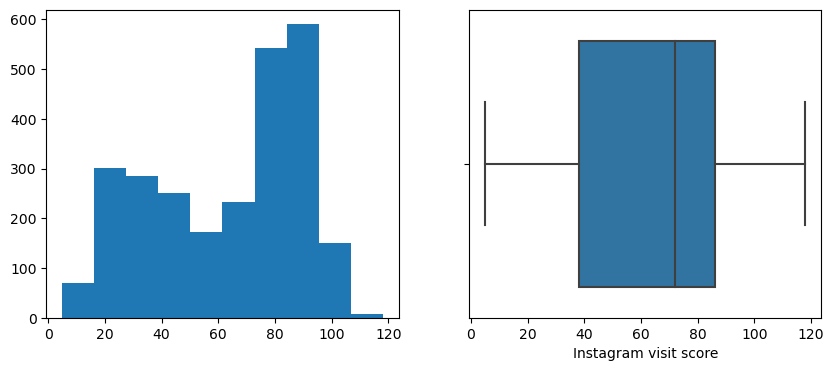

Spending_rank(0 to 100)
Skew :  0.55


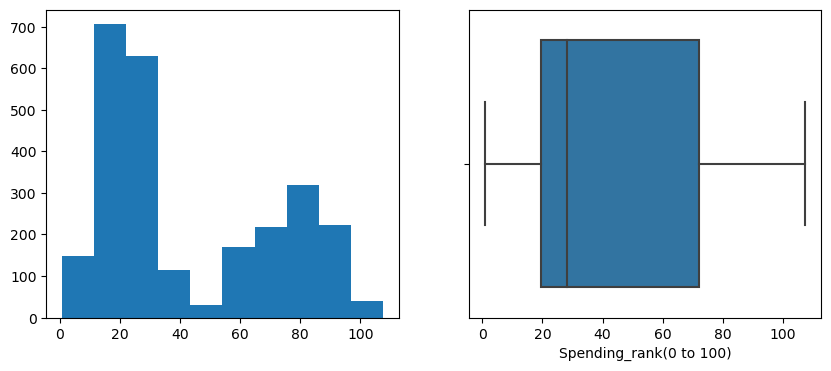

In [22]:
for col in df.columns[0:]:
    print(col)
    print('Skew : ', round(df[col].skew(),2))
    
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10 , grid=False)
    
    plt.subplot(1,2,2)
    sns.boxplot(data=df , x=df[col])
    
    plt.show()

In [14]:
# Spending_rank ranges from 0-100 but there's rows with values more 100 , I will remove any values >100

df[df['Spending_rank(0 to 100)']>100]

,Instagram visit score,Spending_rank(0 to 100)
21,69,106.939372
73,71,104.736057
504,79,101.297469
549,80,107.349821
851,85,104.929548
1135,90,100.105106
1208,80,101.573542
1348,75,102.025441
1489,71,101.105239
1529,85,102.245353


In [15]:
# Create new data frame with outliers removed

df_outliers_removed = df[~(df['Spending_rank(0 to 100)']>100)]

In [16]:
df_outliers_removed.shape

(2586, 2)

In [17]:
df_outliers_removed.describe()

,Instagram visit score,Spending_rank(0 to 100)
count,2586.000000,2586.000000
mean,63.243233,42.522650
std,26.623095,28.491720
min,5.000000,0.940709
25%,38.000000,19.394444
50%,72.000000,27.936836
75%,86.000000,71.556447
max,118.000000,99.982197


<Axes: xlabel='Instagram visit score', ylabel='Spending_rank(0 to 100)'>

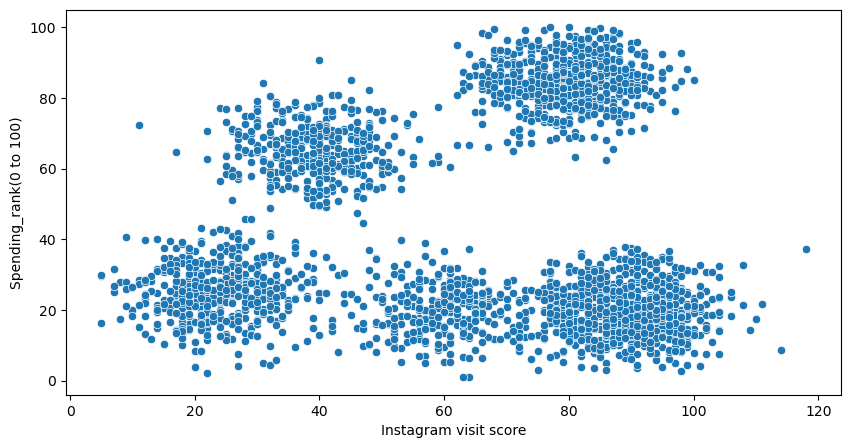

In [26]:
# Scatter plot see how the data looks like / if there's any clustures 

plt.figure(figsize=(10,5))
sns.scatterplot(data=df_outliers_removed , x=df_outliers_removed['Instagram visit score'], y=df_outliers_removed['Spending_rank(0 to 100)'])

In [28]:
# The data looks like it has 5 clustures , I will confirm that using elbow method

k_range = range(1,10)
sse =[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df_outliers_removed[['Instagram visit score','Spending_rank(0 to 100)']])
    
    sse.append(km.inertia_)

C:\Users\DercoN\AppData\Local\anaconda3\envs\Tensor_flow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DercoN\AppData\Local\anaconda3\envs\Tensor_flow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DercoN\AppData\Local\anaconda3\envs\Tensor_flow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DercoN\AppData\Local\anaconda3\envs\Tensor_flow\lib\site-packages\skle

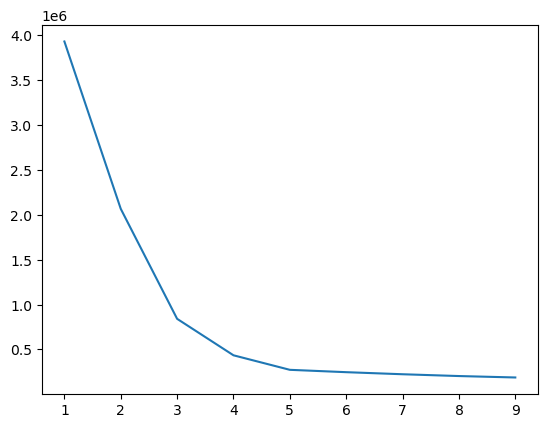

In [29]:
plt.plot(k_range,sse)

In [30]:
# I am now confident that there's 5 clustures 

In [31]:
#Finding clustures using KMeans 

model = KMeans(n_clusters=5)
predicted=model.fit_predict(df_outliers_removed[['Instagram visit score','Spending_rank(0 to 100)']])

C:\Users\DercoN\AppData\Local\anaconda3\envs\Tensor_flow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
predicted

array([4, 4, 1, ..., 3, 1, 2])

In [33]:
df_outliers_removed['Clusture'] = predicted

C:\Users\DercoN\AppData\Local\Temp\ipykernel_5488\2588762834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_removed['Clusture'] = predicted


In [34]:
df_outliers_removed.head()

,Instagram visit score,Spending_rank(0 to 100),Clusture
0,63,24.050708,4
1,61,25.223290,4
2,104,18.528245,1
3,82,86.890232,3
4,14,31.492397,0


In [35]:
df_copy = df_outliers_removed.copy(deep=True)

In [36]:
# Scale data frame for better scatter plot visualization

scaler = MinMaxScaler()

In [37]:
scaler.fit(df_outliers_removed[['Instagram visit score','Spending_rank(0 to 100)']])

MinMaxScaler()

In [38]:
df_outliers_removed[['Instagram visit score','Spending_rank(0 to 100)']] = scaler.transform(df_outliers_removed[['Instagram visit score','Spending_rank(0 to 100)']])

C:\Users\DercoN\AppData\Local\Temp\ipykernel_5488\155049243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_removed[['Instagram visit score','Spending_rank(0 to 100)']] = scaler.transform(df_outliers_removed[['Instagram visit score','Spending_rank(0 to 100)']])


In [39]:
df_outliers_removed.head()

,Instagram visit score,Spending_rank(0 to 100),Clusture
0,0.513274,0.233337,4
1,0.495575,0.245176,4
2,0.876106,0.177577,1
3,0.681416,0.867813,3
4,0.079646,0.308474,0


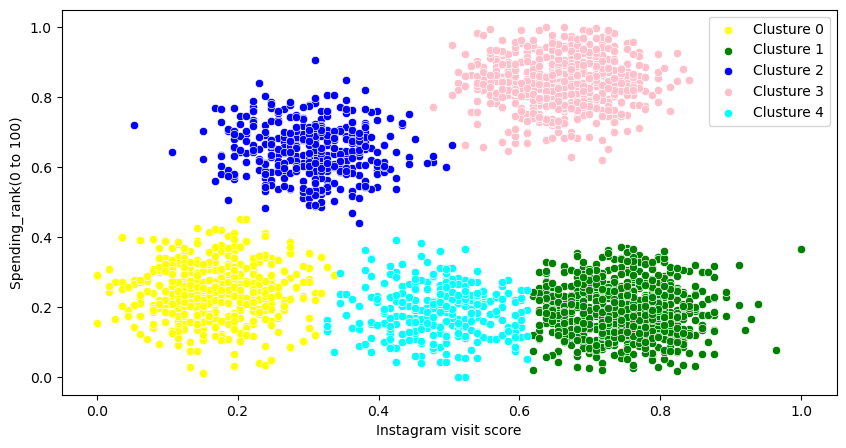

In [49]:
# Now that data is scaled ,re-plot the scatter plot 

df_outliers_removed1=df_outliers_removed[df_outliers_removed.Clusture==0]
df_outliers_removed2=df_outliers_removed[df_outliers_removed.Clusture==1]
df_outliers_removed3=df_outliers_removed[df_outliers_removed.Clusture==2]
df_outliers_removed4=df_outliers_removed[df_outliers_removed.Clusture==3]
df_outliers_removed5=df_outliers_removed[df_outliers_removed.Clusture==4]

plt.figure(figsize=(10,5))
sns.scatterplot(data=df_outliers_removed1 , x=df_outliers_removed1['Instagram visit score'], y=df_outliers_removed1['Spending_rank(0 to 100)'] , color='yellow' ,label='Clusture 0')
sns.scatterplot(data=df_outliers_removed2 , x=df_outliers_removed2['Instagram visit score'], y=df_outliers_removed2['Spending_rank(0 to 100)'] , color='green' ,label='Clusture 1')
sns.scatterplot(data=df_outliers_removed3 , x=df_outliers_removed3['Instagram visit score'], y=df_outliers_removed3['Spending_rank(0 to 100)'] , color='blue' ,label='Clusture 2')
sns.scatterplot(data=df_outliers_removed4 , x=df_outliers_removed4['Instagram visit score'], y=df_outliers_removed4['Spending_rank(0 to 100)'] , color='pink' ,label='Clusture 3')
sns.scatterplot(data=df_outliers_removed5 , x=df_outliers_removed5['Instagram visit score'], y=df_outliers_removed5['Spending_rank(0 to 100)'] , color='cyan' ,label='Clusture 4')

plt.show()

In [50]:
# It did not make much difference but it looks better than the first scatter plot

Now it is possible to check which data belongs to which clusture , I will use df_copy dataframe that I copied ealier

In [51]:
df_copy.head()

,Instagram visit score,Spending_rank(0 to 100),Clusture
0,63,24.050708,4
1,61,25.223290,4
2,104,18.528245,1
3,82,86.890232,3
4,14,31.492397,0


<Axes: xlabel='Clusture', ylabel='count'>

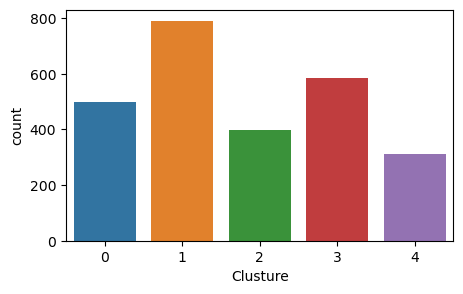

In [52]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_copy , x=df_copy.Clusture)

In [ ]:
# Clusture 1 have the highest number , I will check which data (group) belongs to it

In [53]:
df_copy[df_copy.Clusture==1]

,Instagram visit score,Spending_rank(0 to 100),Clusture
2,104,18.528245,1
9,79,25.966622,1
10,94,24.465674,1
16,98,14.599989,1
17,87,12.504275,1
...,...,...,...
2586,88,25.466974,1
2587,90,33.945098,1
2588,86,15.301323,1
2590,91,18.377420,1


In [54]:
df_copy[df_copy.Clusture==1].describe()

,Instagram visit score,Spending_rank(0 to 100),Clusture
count,791.000000,791.000000,791.0
mean,89.257901,19.963463,1.0
std,7.004103,7.140178,0.0
min,75.000000,2.711249,1.0
25%,84.000000,14.804303,1.0
50%,89.000000,19.708210,1.0
75%,94.000000,24.582180,1.0
max,118.000000,37.701714,1.0


In [55]:
# from above I can confidently conclude that clusture1 belongs to Spending_rank(2 to 37) and Instagram visit score(75 - 118)

In [56]:
df_copy[df_copy.Clusture==1].head(10)

,Instagram visit score,Spending_rank(0 to 100),Clusture
2,104,18.528245,1
9,79,25.966622,1
10,94,24.465674,1
16,98,14.599989,1
17,87,12.504275,1
23,82,14.853354,1
25,76,19.855079,1
27,80,16.637879,1
30,97,14.522322,1
34,85,25.940311,1


In [57]:
# the same can be done to other clustures 

In [58]:
import pickle

In [59]:
with open('model_picle', 'wb') as f:
    pickle.dump(model,f)